## Data visualization

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
df_houses = pd.read_csv("/app/sample-data/california_housing_test.csv")

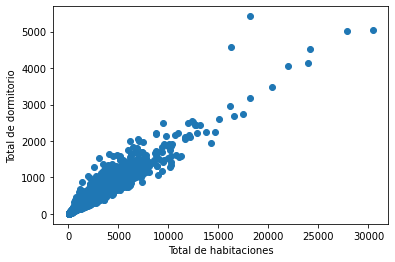

In [93]:
total_bedrooms = df_houses["total_bedrooms"]
total_rooms = df_houses["total_rooms"].astype(int)

plt.scatter(total_rooms, total_bedrooms)
plt.xlabel("Total de habitaciones")
plt.ylabel("Total de dormitorio")
plt.show()

## EDA - Exploratory Data Analysis

In [94]:

import os


# os.open("/app/sample-data/supermarket.csv", 1)
df_supermarket = pd.read_csv("/app/sample-data/supermarket.csv")

In [95]:
print(df_supermarket.shape)
df_supermarket.info()

(9800, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dt

In [96]:
df_supermarket.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [97]:
df_supermarket = df_supermarket.drop_duplicates()
df_supermarket = df_supermarket.dropna()

df_supermarket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9789 non-null   int64  
 1   Order ID       9789 non-null   object 
 2   Order Date     9789 non-null   object 
 3   Ship Date      9789 non-null   object 
 4   Ship Mode      9789 non-null   object 
 5   Customer ID    9789 non-null   object 
 6   Customer Name  9789 non-null   object 
 7   Segment        9789 non-null   object 
 8   Country        9789 non-null   object 
 9   City           9789 non-null   object 
 10  State          9789 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9789 non-null   object 
 13  Product ID     9789 non-null   object 
 14  Category       9789 non-null   object 
 15  Sub-Category   9789 non-null   object 
 16  Product Name   9789 non-null   object 
 17  Sales          9789 non-null   float64
dtypes: float

In [98]:
df_supermarket["Sales"].describe()

count     9789.000000
mean       230.116193
std        625.302079
min          0.444000
25%         17.248000
50%         54.384000
75%        210.392000
max      22638.480000
Name: Sales, dtype: float64

In [160]:
top_cities = df_supermarket.groupby("City")["Sales"].sum().sort_values(ascending=True).head(10).index

sales_by_city_sum = df_supermarket[df_supermarket["City"].isin(top_cities)].groupby("City")["Sales"].sum()
sales_by_city_mean = df_supermarket[df_supermarket["City"].isin(top_cities)].groupby("City")["Sales"].mean()
sales_by_city_max = df_supermarket[df_supermarket["City"].isin(top_cities)].groupby("City")["Sales"].max() 

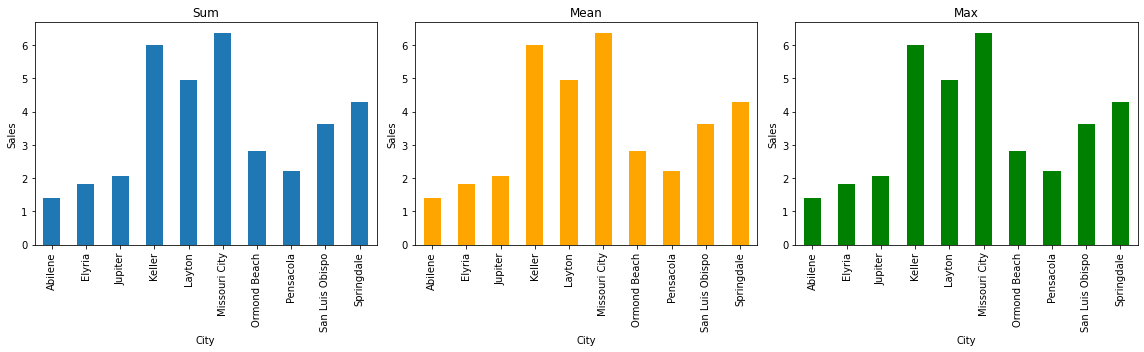

In [161]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))

plt.title("Top City Stats")

sales_by_city_sum.plot(kind="bar", ax=axs[0], title="Sum")
sales_by_city_mean.plot(kind="bar", ax=axs[1], title="Mean", color="orange")
sales_by_city_max.plot(kind="bar", ax=axs[2], title="Max", color="green")

for ax in axs:
    ax.set_xlabel("City")
    ax.set_ylabel("Sales")

plt.tight_layout()
plt.show()